# Decision Tree Model

In [3]:
import numpy as np     # for liner algebra
import pandas as pd    # for data preparation and processing
import seaborn as sns  # forstatistical data visualisation
import matplotlib.pyplot as plt  # for plotting and data visualisation
import graphviz                  # for visualization of leaf nodes

# ( ML linraries for Decision trees)
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

# (Ignore warnings)
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [4]:
df = pd.read_csv('heart_disease.csv')
df.head()   # show the first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
# Columns
"""
cp = chest pain
trestbps = resting blood pressure
cho = cholestrol
fbs = fasting blood sugar
restceg = resting electrocardiography
exang = exercise induced agina
oldpeak = ST depression induced
slope = slope of the peak exercise
ca = number of major vessels
thal = normal cases, fixed defect, reversable defect
target = have diseases or not
"""

'\ncp = chest pain\ntrestbps = resting blood pressure\ncho = cholestrol\nfbs = fasting blood sugar\nrestceg = resting electrocardiography\nexang = exercise induced agina\noldpeak = ST depression induced\nslope = slope of the peak exercise\nca = number of major vessels\nthal = normal cases, fixed defect, reversable defect\ntarget = have diseases or not\n'

In [11]:
# from this dataset;
# Target feature is the dependant variable
# we shall use target- 0 to mean absence of heart disease 
# we shall use target- 1 to mean presence of heart disease

# Showing the number pf people with heart disease
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [15]:
# Heart disease distribution according to gendeer in percentages

count_female = len(df[df.sex==0])
count_male   = len(df[df.sex==1])

# ouput
print('Percentage of female patients:{:.2f}%'.format(count_female/(len(df.sex))*100))
print('Percentage of male patients:{:.2f}%'.format(count_male/(len(df.sex))*100))

Percentage of female patients:30.44%
Percentage of male patients:69.56%


In [16]:
# Show the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [17]:
# Checking for null or NaN values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
# ML train and test data
# Create Logistic regression
y = df.target.values
x_data = df.drop(['target'],axis=1)

In [20]:
# Split the data for training data 67% and testing 33%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y,test_size=0.33, random_state=42)

In [21]:
# check shape of data remaining after splitting for training and testing
x_train.shape, x_test.shape

((686, 13), (339, 13))

In [22]:
# check the datatype
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [23]:
# check X_train header
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
866,41,1,2,112,250,0,1,179,0,0.0,2,0,2
749,58,1,1,125,220,0,1,144,0,0.4,1,4,3
212,50,1,0,150,243,0,0,128,0,2.6,1,0,3
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2
148,52,1,3,152,298,1,1,178,0,1.2,1,0,3


In [28]:
clf_gini = DecisionTreeClassifier(criterion= 'gini', max_depth =3,random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [31]:
# predicting the class label for the test data using the decision tree classifier
y_pred_gini = clf_gini.predict(x_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index:{0:0.4f}'. format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index:0.8112


In [32]:
# predicting class lables for training data using decision tree classifier
y_pred_train_gini =clf_gini.predict(x_train)
y_pred_train_gini 

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [35]:
# print the training and testing set of accuracy score
print('training set accuracy score:{0:0.4f}'.format(clf_gini.score(x_train,y_train)))
print('testing set accuracy score:{0:0.4f}'.format(clf_gini.score(x_test,y_test)))


training set accuracy score:0.8630
testing set accuracy score:0.8112


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.499\nsamples = 686\nvalue = [328, 358]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.381\nsamples = 332\nvalue = [247, 85]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 148\nvalue = [71, 77]'),
 Text(0.0625, 0.125, 'gini = 0.344\nsamples = 86\nvalue = [19, 67]'),
 Text(0.1875, 0.125, 'gini = 0.271\nsamples = 62\nvalue = [52, 10]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.083\nsamples = 184\nvalue = [176, 8]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4375, 0.125, 'gini = 0.045\nsamples = 174\nvalue = [170, 4]'),
 Text(0.75, 0.625, 'x[9] <= 1.95\ngini = 0.353\nsamples = 354\nvalue = [81, 273]'),
 Text(0.625, 0.375, 'x[12] <= 2.5\ngini = 0.283\nsamples = 317\nvalue = [54, 263]'),
 Text(0.5625, 0.125, 'gini = 0.183\nsamples = 245\nvalue = [25, 220]'),
 Text(0.6875, 0.125, 'gini = 0.481\nsamples = 72\nvalue = [29, 43]'),
 Text(0.875, 0.375, 'x[10] <= 0.5\ngini = 0.394\nsamples = 37\nvalue = [27,

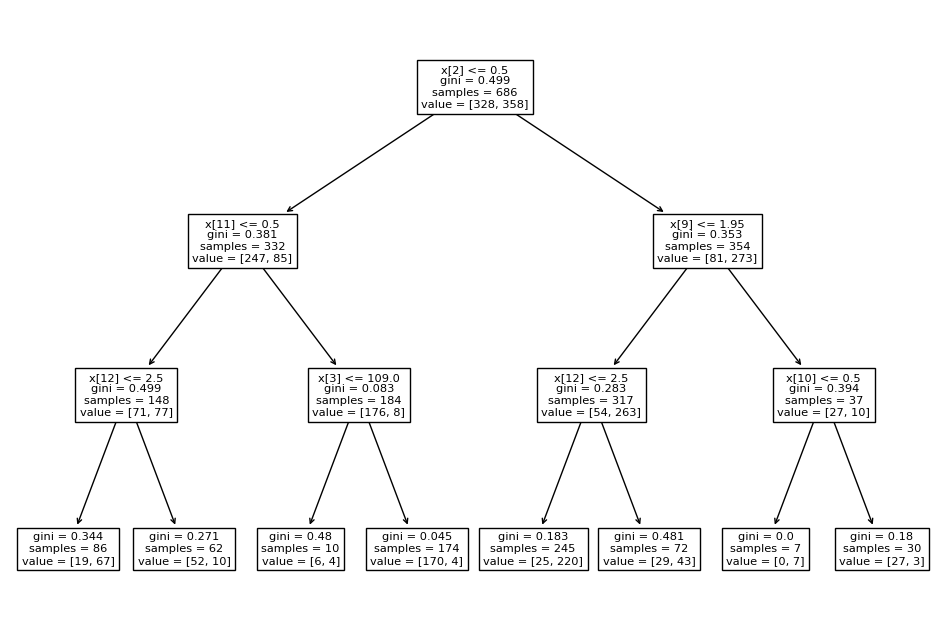

In [37]:
#1st way to visualize a decision tree leaf node
#Create a figure for width and height
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [41]:
#Visualization of decision tree 
import graphviz
import pandas as pd
from sklearn.model_selection import train_test_split

#Load data
heart_data = pd.read_csv('heart_disease.csv')
y=heart_data['target'].values
x_data =heart_data.drop(['target'],axis=1)

#trainthe decison tree classifier
model= tree.DecisionTreeClassifier()
model.fit(x_data,y)

# Get the class name  from the dataset
class_name = heart_data['target'].unique().astype(str)

#Generate the graph visualization
tree.export_graphviz(model, out_file='heart_disease1.dot',
                     feature_names=x_data.columns,
                     label='all',
                     filled=True, rounded=True)